In [41]:
print("helo world")

helo world


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [43]:
import pandas as pd
# Handle Categorical data
states = pd.get_dummies(df['State'],drop_first=True)

# Dropping extra columns
df = df.drop(['State'],axis=1)


# Concatenation of independent variables and new categorical variables
df = pd.concat([df,states],axis=1)
df.head()


,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [44]:
#Dividing dataset into independent and dependent variables
X = df.drop(['Profit'],axis=1)
y = df['Profit']

In [45]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
#   Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
#   Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([126187.39411512,  85788.82259489,  99777.0281516 ,  45706.12238325,
       127062.20722787,  51891.83884402, 109114.62977498, 100600.61123707,
        97953.99874703, 111730.57706801, 128818.49200667, 174195.35772603,
        93736.28538393, 148381.04097174, 172313.87139381])

In [52]:
#   Calculating the R squared value
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("r2 score is ", score)
#print the mean squared error
from sklearn.metrics import mean_squared_error
print("mean squared error is ", mean_squared_error(y_test,y_pred))
#print the mean absolute error
from sklearn.metrics import mean_absolute_error
print("mean absolute error is ", mean_absolute_error(y_test,y_pred))
#print the root mean squared error
from sklearn.metrics import mean_squared_error
print("root mean squared error is ", np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score is  0.93971080633682
mean squared error is  84826955.03358741
mean absolute error is  7395.433531431921
root mean squared error is  9210.154995090334


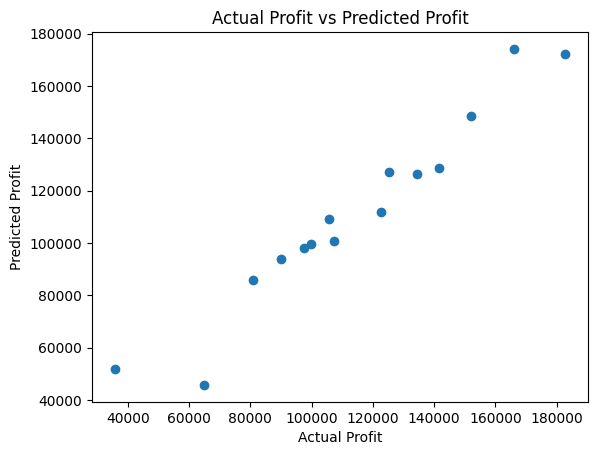

In [53]:
import matplotlib.pyplot as plt

# plotting the graph
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual Profit vs Predicted Profit")
plt.show()
